# Figure 4: 
**Author:** Juan Bolanos  
**Date:** 2025-02-27  
**Description:** This notebook generates Figure 4B, Abundance of circulating strains.<br>
**Files Needed**: 
* [Metadata.csv](https://zenodo.org/records/14940367/files/Metadata.csv?download=1)



Find all date here:
[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.14940367.svg)](https://doi.org/10.5281/zenodo.14940367)


### Step 1: Install Libraries

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Read Metadata file 


In [31]:
# Load the metadata file
file_path = '/Users/juanbolanos/Desktop/Phylogenetisc_Paper/Dornburg-Review/Final-Data/scripts/Stack_BarPlot_LTT/All_metadata-with-building.csv'
metadata = pd.read_csv(file_path)

/var/folders/95/yn6r42053b9g3z2l69r9k_6c0000gn/T/ipykernel_44746/2745633831.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  metadata_filtered['date'] = pd.to_datetime(metadata_filtered['date'], errors='coerce')


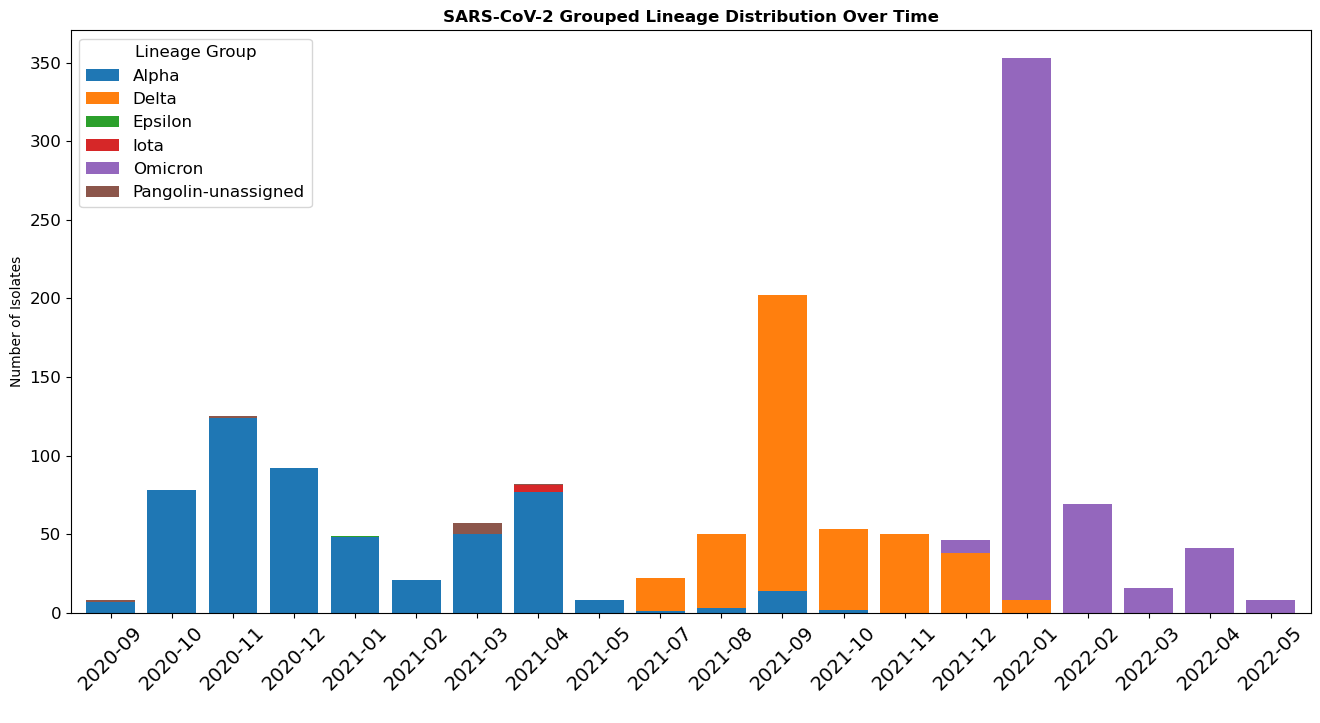

In [6]:
# Remove 'Wuhan-hu-1' from the 'strain' column before processing further
metadata_filtered = metadata[metadata['strain'] != 'Wuhan-hu-1']

# Convert the 'date' column to datetime format
metadata_filtered['date'] = pd.to_datetime(metadata_filtered['date'], errors='coerce')

# Drop rows with missing or invalid dates and missing pangolin_lineage
metadata_clean = metadata_filtered.dropna(subset=['date', 'pangolin_lineage'])

# Create a new column 'lineage_group' for the grouped categories
metadata_clean['lineage_group'] = metadata_clean['pangolin_lineage'].apply(lambda x: 
    'Alpha' if x.startswith('B.1') and x not in ['B.1.427', 'B.1.526'] else
    'Epsilon' if x == 'B.1.427' else
    'Iota' if x == 'B.1.526' else
    'Delta' if x.startswith('AY.') else
    'Omicron' if x.startswith('BA.') else
    'Pangolin-unassigned')

# Group the data by date and the new 'lineage_group' column
grouped_lineage_distribution_filtered = metadata_clean.groupby([metadata_clean['date'].dt.to_period('M'), 'lineage_group']).size().unstack().fillna(0)

# Create a stacked bar plot for the grouped lineages
plt.figure(figsize=(13.33, 7.33))

# Plot the data
ax = grouped_lineage_distribution_filtered.plot(kind='bar', stacked=True, ax=plt.gca(), width=0.8)

# Add title and labels
plt.title('SARS-CoV-2 Grouped Lineage Distribution Over Time',fontweight='bold')
plt.xlabel(' ')
plt.ylabel('Number of Isolates')

# Remove individual labels inside the bars and keep the x-axis labels as they were
plt.xticks(rotation=45,fontsize=14)
plt.yticks(fontsize=12)

# Display the legend on the left side inside the plot
plt.legend(title='Lineage Group', loc='upper left', bbox_to_anchor=(0, 1), fontsize=12, title_fontsize=12)

# Tight layout for better appearance
plt.tight_layout()

# Save the plot as a pdf file in the current directory
#plt.savefig('StackedBar_LTT.pdf', format='pdf', dpi=300)

# Save the plot as a png file in the current directory
#plt.savefig('StackedBar_LTT.png', format='png', dpi=300)

# Show the plot
plt.show()
